In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline

tweets = pd.read_csv("tweets.csv")
tweets.shape

(4402, 15)

In [3]:
tweets.head(10)

,id,created,geo,user_name,id_str,coordinates,text,user_followers,subjectivity,user_bg_color,retweet_count,user_location,user_created,user_description,polarity
0,1,2016-08-02T07:26:47,NaN,jfk117,760376282706223104,NaN,RT @andendall: how could people vote for Trump...,706,0.000000,ABB8C2,0,Where I Belong,2008-05-13T20:28:38,I know you'll find a way. Inadvertent sorceres...,0.000000
1,2,2016-08-02T07:26:47,NaN,kaderadenurface,760376282865668096,NaN,RT @benswasey: Gallup finds the RNC was a net ...,2471,0.200000,000000,0,"New York, NY",2010-08-30T03:21:35,"28. Best Selling, Award Winning M/M Romance Au...",-0.150000
2,3,2016-08-02T07:26:47,NaN,DMashak,760376283620528128,NaN,RT @herself311: Clinton Delegate Turns Whistle...,92487,0.000000,000000,0,"Minneapolis, Minnesota USA",2007-11-13T07:39:53,"Don Mashak,The Cynical Patriot #NaturalLaw #Co...",0.000000
3,4,2016-08-02T07:26:47,NaN,LadyMercia,760376283784151040,NaN,Khizr Khan Attack on Donald Trump Goes Down in...,5985,0.288889,C0DEED,0,ENGLAND GREAT BRITAIN,2014-03-09T16:11:14,"Respect To Our Armed Forces Past & Present, Pr...",-0.155556
4,5,2016-08-02T07:26:47,NaN,DonnaKichmond,760376284182491136,NaN,RT @Ricky_Vaughn99: Clinton Was Director Of Co...,1570,0.000000,C0DEED,0,NaN,2015-09-18T06:29:39,NaN,0.000000
5,6,2016-08-02T07:26:47,NaN,dbhermosa,760376284258050052,NaN,"@trumpopulist They earned the right to speak, ...",20,0.811905,C0DEED,0,NaN,2012-10-17T02:39:15,NaN,0.328571
6,7,2016-08-02T07:26:47,NaN,CraigieFergie,760376284346195968,NaN,I can't tell the difference between the parody...,532,0.300000,C0DEED,0,Manchester,2012-05-09T20:15:09,Not to be mistaken for the TV host! Walking to...,0.200000
7,8,2016-08-02T07:26:48,NaN,ZeeNewsLIVE,760376284811816960,NaN,US Presidential Elections: War of words! Why D...,43,0.000000,000000,0,India,2015-10-05T15:27:08,"Zee News LIVE - Find Zee News, Zee News India,...",0.000000
8,9,2016-08-02T07:26:48,NaN,janshappygrub,760376285923160064,NaN,RT @azmoderate: Donald Trump Avoided Draft Wit...,642,0.000000,FFFFFF,0,Los Angeles,2008-08-09T16:47:58,"Politics, Foodie, Lover of the Blue Heeler and...",0.000000
9,10,2016-08-02T07:26:48,NaN,PattyBarden,760376286988476416,NaN,Trump fires at least 2 aides https://t.co/YqXv...,445,0.400000,C0DEED,0,In the DMV,2013-02-21T19:07:36,"Your Pattyness, or uh, PaTita or La Patina if ...",-0.300000


**Here’s a quick explanation of the important columns in the data:**

    id – the id of the row in the database (this isn’t important).
    id_str – the id of the tweet on Twitter.
    user_location – the location the tweeter specified in their Twitter bio.
    user_bg_color – the background color of the tweeter’s profile.
    user_name – the Twitter username of the tweeter.
    polarity – the sentiment of the tweet, from -1, to 1. 1 indicates strong positivity, -1 strong negativity.
    created – when the tweet was sent.
    user_description – the description the tweeter specified in their bio.
    user_created – when the tweeter created their account.
    user_follower – the number of followers the tweeter has.
    text – the text of the tweet.
    subjectivity – the subjectivity or objectivity of the tweet. 0 is very objective, 1 is very subjective.


In [4]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("Clinton")
    if "trump" in text or "donald" in text:
        candidates.append("Trump")
    if "kaine" in text or "tim" in text:
        candidates.append("Kain")
    if "pence" in text or "Mike" in text:
        candidates.append("Pence")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

In [5]:
tweets.head(10)

,id,created,geo,user_name,id_str,coordinates,text,user_followers,subjectivity,user_bg_color,retweet_count,user_location,user_created,user_description,polarity,candidate
0,1,2016-08-02T07:26:47,NaN,jfk117,760376282706223104,NaN,RT @andendall: how could people vote for Trump...,706,0.000000,ABB8C2,0,Where I Belong,2008-05-13T20:28:38,I know you'll find a way. Inadvertent sorceres...,0.000000,Trump
1,2,2016-08-02T07:26:47,NaN,kaderadenurface,760376282865668096,NaN,RT @benswasey: Gallup finds the RNC was a net ...,2471,0.200000,000000,0,"New York, NY",2010-08-30T03:21:35,"28. Best Selling, Award Winning M/M Romance Au...",-0.150000,Trump
2,3,2016-08-02T07:26:47,NaN,DMashak,760376283620528128,NaN,RT @herself311: Clinton Delegate Turns Whistle...,92487,0.000000,000000,0,"Minneapolis, Minnesota USA",2007-11-13T07:39:53,"Don Mashak,The Cynical Patriot #NaturalLaw #Co...",0.000000,Clinton
3,4,2016-08-02T07:26:47,NaN,LadyMercia,760376283784151040,NaN,Khizr Khan Attack on Donald Trump Goes Down in...,5985,0.288889,C0DEED,0,ENGLAND GREAT BRITAIN,2014-03-09T16:11:14,"Respect To Our Armed Forces Past & Present, Pr...",-0.155556,Trump
4,5,2016-08-02T07:26:47,NaN,DonnaKichmond,760376284182491136,NaN,RT @Ricky_Vaughn99: Clinton Was Director Of Co...,1570,0.000000,C0DEED,0,NaN,2015-09-18T06:29:39,NaN,0.000000,Clinton
5,6,2016-08-02T07:26:47,NaN,dbhermosa,760376284258050052,NaN,"@trumpopulist They earned the right to speak, ...",20,0.811905,C0DEED,0,NaN,2012-10-17T02:39:15,NaN,0.328571,Trump
6,7,2016-08-02T07:26:47,NaN,CraigieFergie,760376284346195968,NaN,I can't tell the difference between the parody...,532,0.300000,C0DEED,0,Manchester,2012-05-09T20:15:09,Not to be mistaken for the TV host! Walking to...,0.200000,Trump
7,8,2016-08-02T07:26:48,NaN,ZeeNewsLIVE,760376284811816960,NaN,US Presidential Elections: War of words! Why D...,43,0.000000,000000,0,India,2015-10-05T15:27:08,"Zee News LIVE - Find Zee News, Zee News India,...",0.000000,"Clinton,Trump"
8,9,2016-08-02T07:26:48,NaN,janshappygrub,760376285923160064,NaN,RT @azmoderate: Donald Trump Avoided Draft Wit...,642,0.000000,FFFFFF,0,Los Angeles,2008-08-09T16:47:58,"Politics, Foodie, Lover of the Blue Heeler and...",0.000000,Trump
9,10,2016-08-02T07:26:48,NaN,PattyBarden,760376286988476416,NaN,Trump fires at least 2 aides https://t.co/YqXv...,445,0.400000,C0DEED,0,In the DMV,2013-02-21T19:07:36,"Your Pattyness, or uh, PaTita or La Patina if ...",-0.300000,Trump


** Search for candidate name in "text" append it to a dataframe as a column "candiadates"**

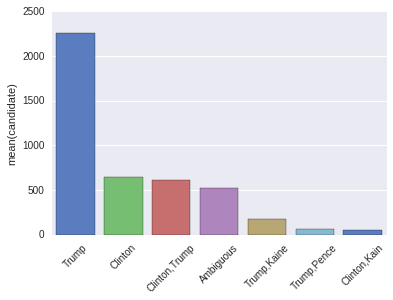

Trump            2261
Clinton           647
Clinton,Trump     612
                  520
Trump,Kain        175
Trump,Pence        64
Clinton,Kain       50
Name: candidate, dtype: int64


In [13]:
counts = tweets["candidate"].value_counts().head(7)
labels = ["Trump","Clinton","Clinton,Trump","Ambiguous","Trump,Kaine","Trump,Pence","Clinton,Kain"]
sns.barplot(labels, counts,palette="muted")

plt.xticks(rotation=45)
plt.show()

print(counts)

**Count the number of tweets for candidate combinations, Trump has most number of tweets** 

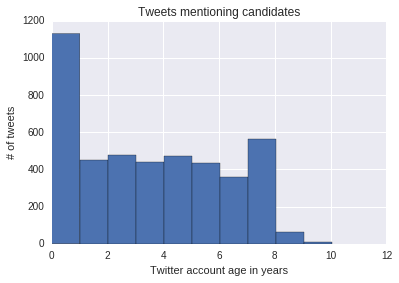

In [14]:
tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

**This graph gives us a sense of number of tweets vs age of twitter account making the tweet**

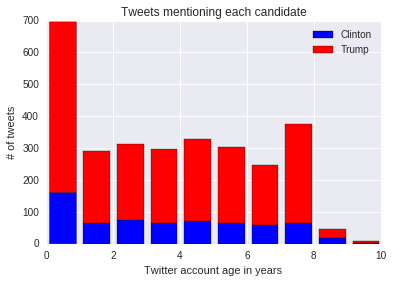

In [15]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "Clinton"]
#ck_tweets = tweets["user_age"][tweets["candidate"] == "Clinton,Kaine"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "Trump"]
#tp_tweets = tweets["user_age"][tweets["candidate"] == "Trump,Pence"]
plt.hist([
        cl_tweets, 
        
        tr_tweets
        
    ], 
    stacked=True,
    color=["Blue","Red"],
    label=["Clinton", "Trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")


plt.show()

**This map is stacked for number of Clinton tweets vs Trump tweets  as per twitter account age. It is safe to say that for this sample candidate Donald Trump has maximum number of tweets,from the new twitter account holders and again from older 8 year old account holders Thus, the 35-49 year olds are likely to tweet about Trump http://www.pewinternet.org/2009/02/12/twitter-and-status-updating/ as nearly 20% of all twitter users that joint the site in 2008(8 years back)were aged between 25-34. Also 18-29 year olds are much more likely to tweet about Trump as is clear 2016 twitter demographics https://blog.hootsuite.com/top-social-media-sites-matter-to-marketers/ where they make up nearly 37% of the  twitter population**

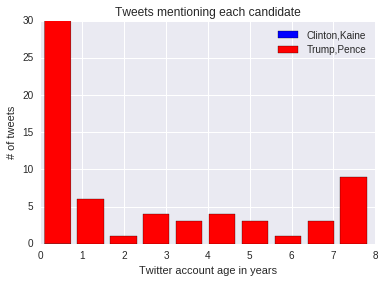

In [16]:

ck_tweets = tweets["user_age"][tweets["candidate"] == "Clinton,Kaine"]

tp_tweets = tweets["user_age"][tweets["candidate"] == "Trump,Pence"]
plt.hist([
        ck_tweets, 
        
        tp_tweets
        
    ], 
    stacked=True,
    color=["Blue","Red"],
    label=["Clinton,Kaine", "Trump,Pence"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

** As is clear from the above chart, the Trump-Pence ticket is drawing the most reaction as compared to the Clinton-Kain ticket,we will further look into the polarity of  those reactions **

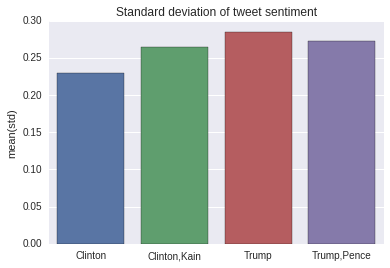

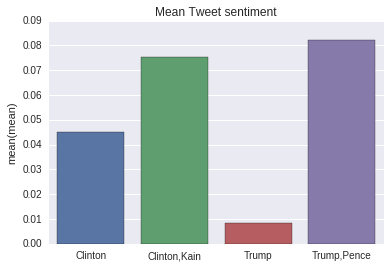

In [24]:
t = tweets[(tweets["candidate"]=="Clinton")|(tweets["candidate"]=="Trump")|(tweets["candidate"]=="Clinton,Kain")|(tweets["candidate"]=="Trump,Pence")]

gr = t.groupby("candidate").agg([np.mean, np.std])


x = ["Clinton","Clinton,Kain","Trump","Trump,Pence"]
std = gr["polarity"]["std"]
mean = gr["polarity"]["mean"]

sns.barplot(x,std)
plt.title("Standard deviation of tweet sentiment")

plt.show()

sns.barplot(x,mean)
plt.title("Mean Tweet sentiment")
plt.show()



**Lets look at mean first, We can see that almost all comments about trump are negative since the mean is closer to zero,However an interesting point to note is that Trump-Pence ticket choice is appreciated a lot more than Clinton-Kain. Will it come down to the choce of VP between Clinton and Trump? It remains to be seen as the above mean is just a random sample mean. 
****With the Standard Deviation chart we can see that our data collected is not very dispersed,we will need to collected more data to qualify the Mean chart  **

In [25]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["Clinton","Trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

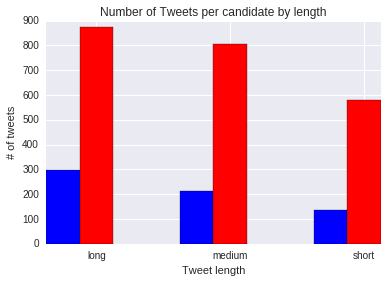

In [26]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["Clinton"], width, color='b')

ax.bar(x + (width), tl["Trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

**We can see from above chart that the longest tweets  are for candidate Donald  **